# Diamonds price prediction based on their cut, color, clarity, price with PyTorch
### A guide to building a simple Linear Regression model in Pytorch

                                       Source : Opensourceforu.com

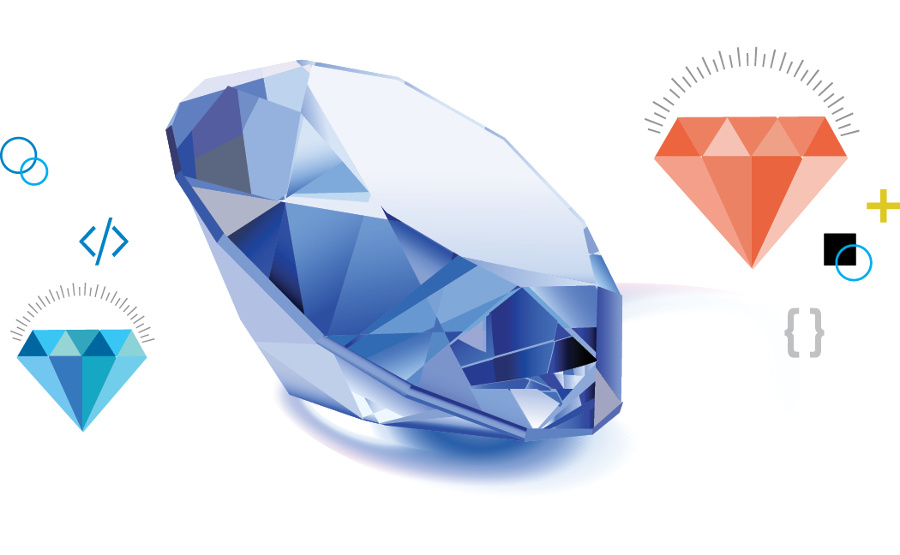

Have you ever asked yourself, how the diamonds are to be priced !! Well, this article talks about the diamonds price prediction based on their cut, colour, clarity & other attributes and it also covers the building a simple linear regression model using PyTorch.

I have started my PyTorch journey with ["Deep Learning with PyTorch: Zero to Gans"](https://jovian.ml/forum/c/pytorch-zero-to-gans/18) course and now we are in the second week of this course, till now we have covered the basics and implementation of Linear & Logistic regressions in PyTorch. Please refer to this [article](https://medium.com/@vinneelaero/introduction-to-basic-pytorch-tensor-functions-51cb5b58713) for basic PyTorch functions.

## What is Linear Regression :

Linear Regression is one of the simplest algorithms in Machine Learning. As per statistics, the term **Regression** is defined as a measure of the relation between an output variable and the input variable(s), hence, Linear Regression assumes a linear relationship between the independent (input) and dependent (output) variable.

More Generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a bias (also called the intercept) term. [(Source)](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) as  shown in below equation 

$$\hat{y} = w_1  x_1 + ... + w_n  x_n + b.$$

In this equation :

- $\theta_1 ... \theta_n$ are called parameters
- $x_1 ... x_n$ input features & n is the no.of. features
- $\hat{y}$ ... Predicted value (* A continuous variable)

![Linear Regression](simple_regression.png)

I have considered the classic Diamonds dataset which contains the prices and other attributes of almost 54,000 diamonds and this dataset is hosted on [Kaggle](https://www.kaggle.com/shivam2503/diamonds). The dataset contains  53940 rows and 10 variables. Before jumping into building the model, let's have a look into the variables & their definitions.

- **Price** is in US dollars 

- **Carat** weight of the diamond 

- **Cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

- **color** diamond colour, from J (worst) to D (best)

- **clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

- **x** length in mm 

- **y** width in mm 

- **z** depth in mm

- **depth**  : The height of a diamond

- **table**  : The width of the diamond's table expressed as a percentage of its average diameter


### Let's get started to build the linear regression model based on the following steps

1. Import Required Packages
2. Load the dataset 
3. Perfrom the exploratory data analysis (EDA)
4. Prepare the dataset for training
5. Create a linear regression model
6. Train the model to fit the data
7. Make predictions using the trained model

## Step 1 : Import Required Packages

In [1]:
# Imports
import torch
import numpy as np
import jovian
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

I will be using **pandas_bokeh** library for some of the visualizations while doing EDA. Pandas-Bokeh provides a Bokeh plotting backend for Pandas DataFrames, similar to the already existing Visualization feature of Pandas. With Pandas-Bokeh we can create the stunning, interactive  HTML-based visualization. For more details please refer this [link](https://github.com/PatrikHlobil/Pandas-Bokeh#Examples) 

## Step 2 : Load the dataset

To load the dataset, will be using `pd.read_csv()`function and it will convert the dataset to a dataframe and have a lookinto the top 5 rows of dataset using `pd.head()` function

In [3]:
data = pd.read_csv('Data\diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Drop the column "Unnamed: 0", which is unncessary

In [4]:
data.drop(columns = 'Unnamed: 0', axis = 1, inplace = True )
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.shape

(53940, 10)

The dataet has 53940 rows & 10 variables

## Step 3 : Exploratory Data Analysis (EDA)

Look at the concise summary of the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


There is no null data in the dataset and the same can also be checked by using `data.isnull().any`. The given dataset has 6 numeric columns and three non-numric (categorical) columns

Get the descriptive statistics of the dataset using `pd.describe()`

In [7]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Observed that the minimum value of x (length), y(width) & z(depth) is zero and It doesn't make any sense to have length\width\depth of a diamond to be zero.

In [8]:
temp = data[['x','y','z']].replace(0,np.NaN)
temp.isnull().sum()

x     8
y     7
z    20
dtype: int64

There are total of 20 rows having x or y or z to be zero and now we will drop those rows

In [9]:
data = data.loc[(data[['x','y','z']]!=0).all(axis=1)]
data.shape

(53920, 10)

In [10]:
#Just to confirm that there won't be any zero values rows
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Observed that the minimum values of x,y&z are non-zero values

Plot the distributions of numerical attributes by using `hist()` method

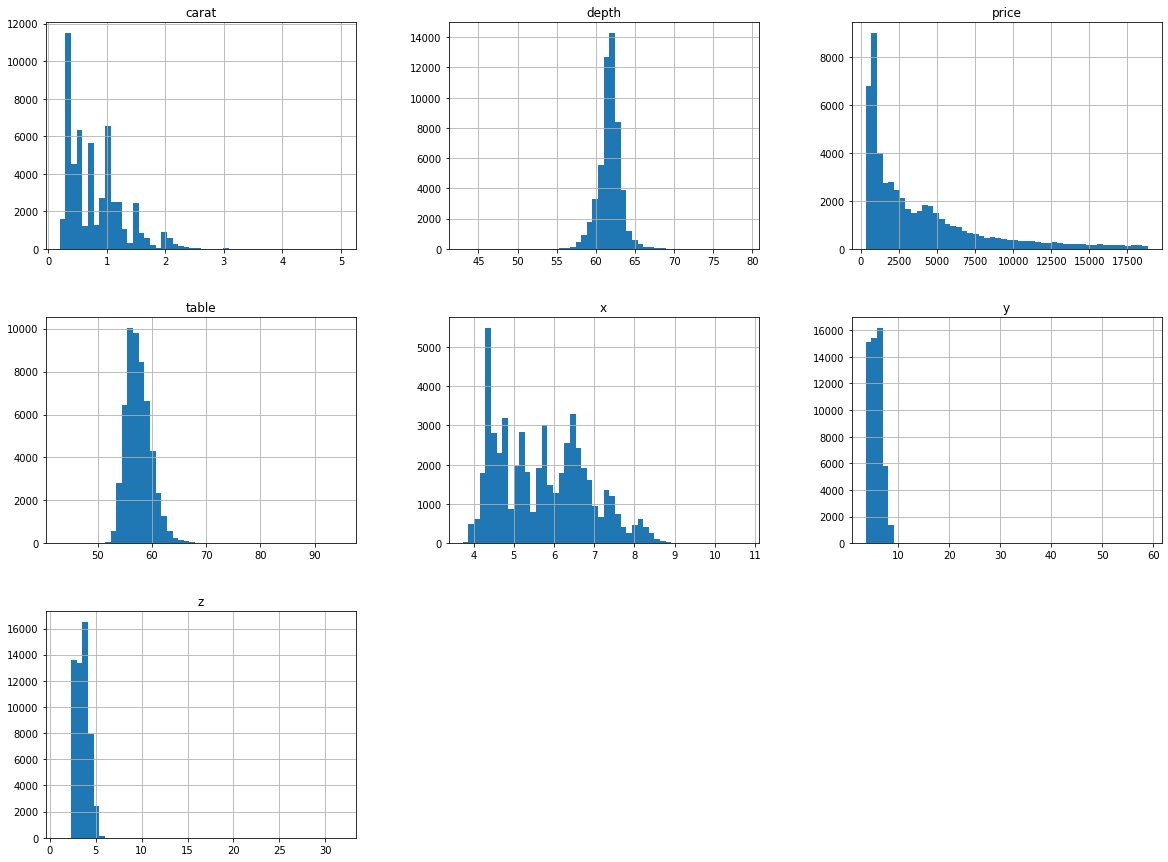

In [12]:
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15))
plt.show()

Lets look at the pair plot of the dataset. Pair plot allows us to see both the distribution of variables and also the relationships between two variables 

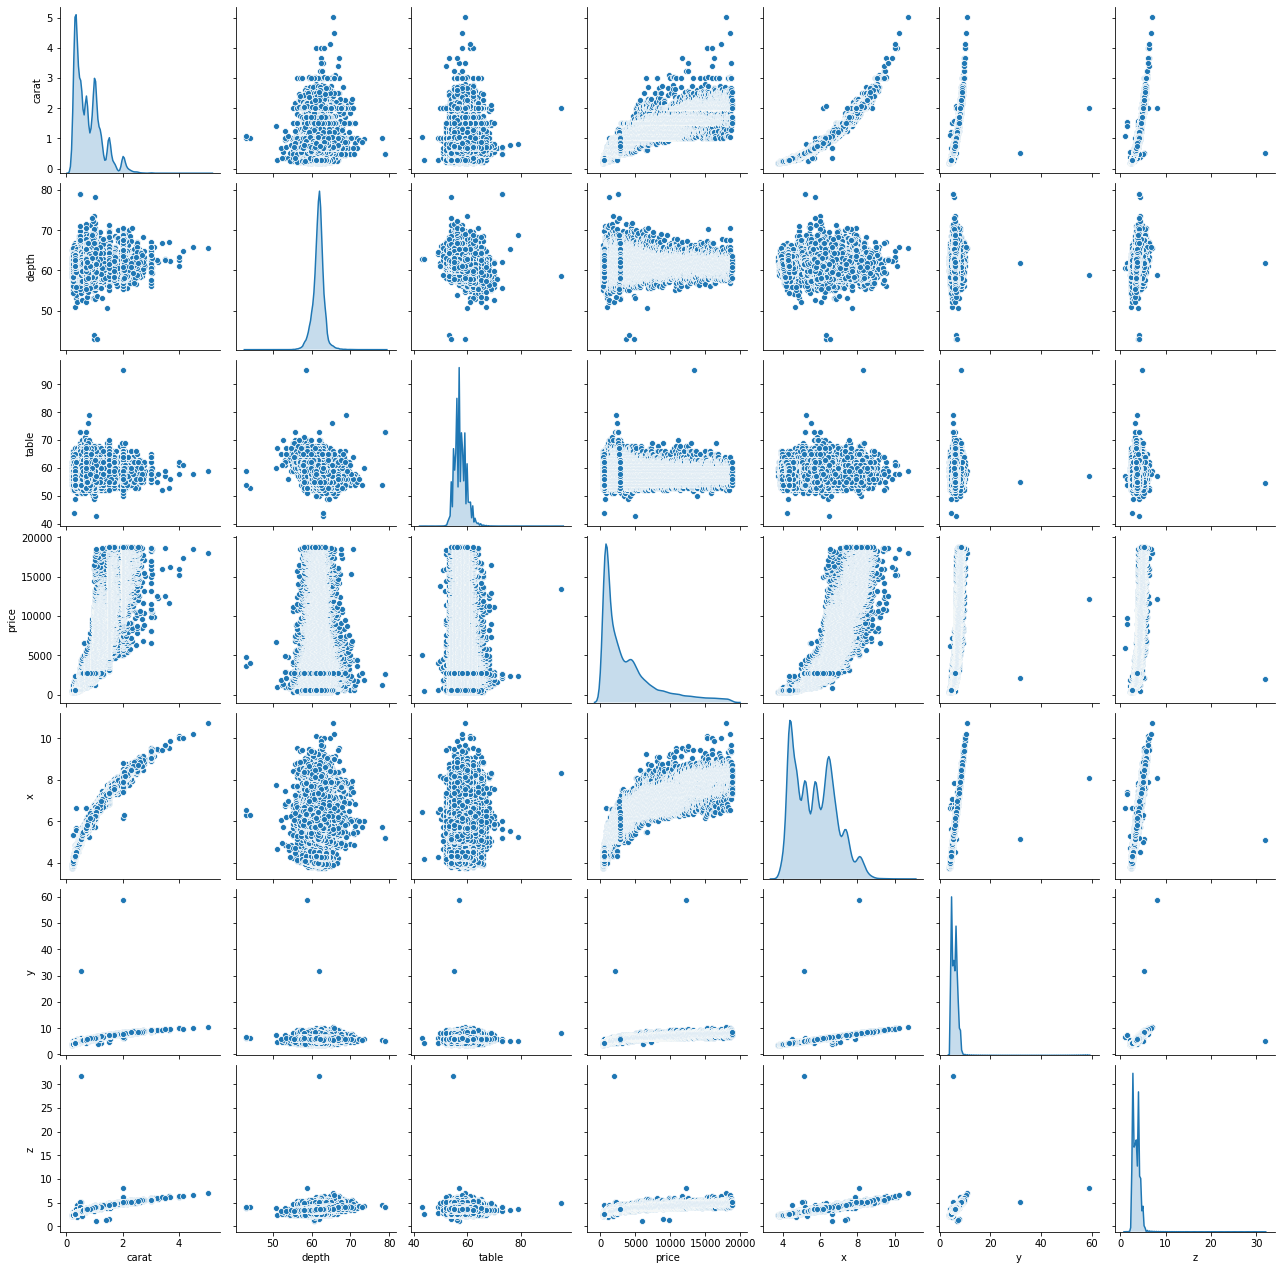

In [13]:
sns.pairplot(data , diag_kind = 'kde');

Observed that x,y&z variables has good corrleation with respect to the dependent variable (target) price and let's quanitfy that correlation by using `.corr()` & visualize the same using `sns.heatmap()` method

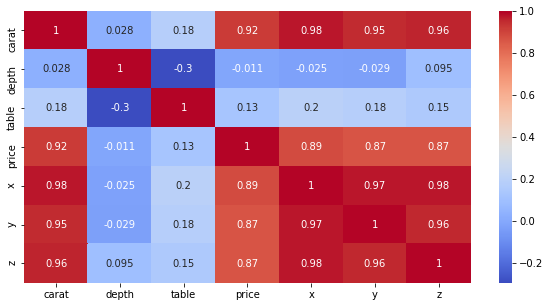

In [14]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(),annot = True , cmap = 'coolwarm' );

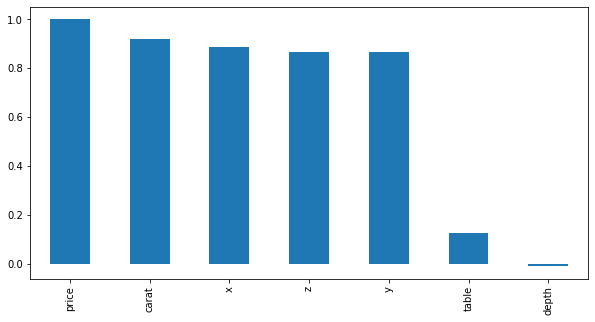

In [15]:
corr_mat = data.corr()
plt.figure(figsize = (10,5))
corr_mat['price'].sort_values(ascending = False).plot(kind = 'bar');

We can conclude that carat,x,y & z features has strong correlation w.r.t price variable and depth has very weak relation w.r.t price variable. Hence, we can drop depth feature from the final list of input features to the model.

Let's have a sense of categorical features with respect to target (price) variable by using box plots

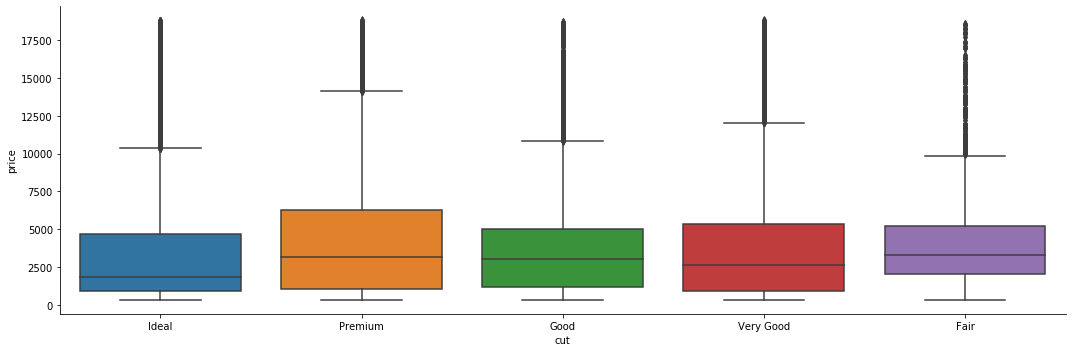

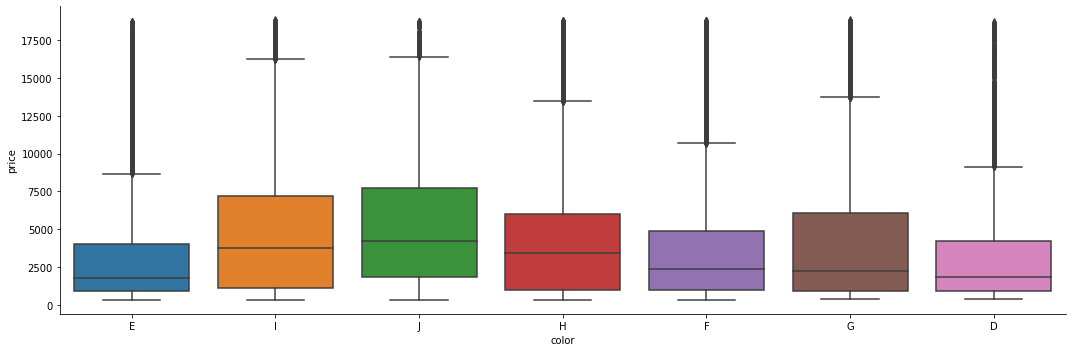

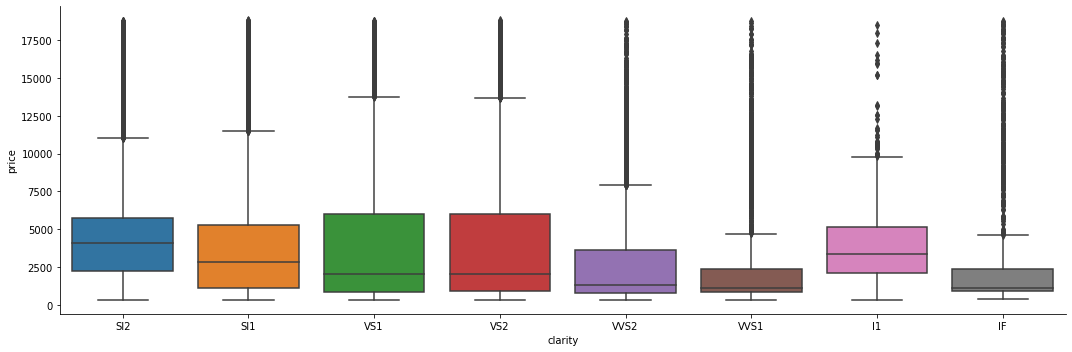

In [300]:
input_cat_columns = data.select_dtypes(include = ['object']).columns.tolist()

for col in input_cat_columns:
    sns.catplot(x=col, y="price",
            kind="box", dodge=False, height = 5, aspect = 3,data=data);
    

I have used the boxplots to compare the data spread, central tendencies (Median), variability amongst the categories of a given categorical variable and these plots also helps to identify the outliers.

Till now, I have done very preliminary data exploration to understand the features and its their relation with respect to target variable. And the main objective of this article is to implement the linear regression in pytorch, so let's stop the data exploration and jump into the main core of the article.

Before proceeding to building the model, it is good to convert the categorical data to numercal data and there are two ways to convert to numerical form
1. Label Encoder or Integer Encoding
2. One-hot Encoding

In general one-hot encoding does good job and for further details please refer this [link](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) 

In [16]:
data_one_hot_encoding = pd.get_dummies(data)
data_one_hot_encoding.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


We have created new features by converting the categroical data to numerical data and now lets take a final look at the corrleation plots 

In [19]:
data_one_hot_encoding.columns.values

array(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype=object)

## Step 4 : Prepare the dataset for training

Set some hyperparameters for dataset preparation

In [220]:
val_percent = 0.20 #Consider 15% of data as validation data
batch_size = 16
torch.manual_seed(99) # Set Seed for Reproducibility 

In [221]:
#selected input cols to predict the diamond price
input_cols = data_one_hot_encoding.columns.values.tolist() # Converting the dataframe columns to list
input_cols.remove('price')
input_cols.remove('depth')

#Price is the target variable
output_col = ['price']

We need to convert the data from the Pandas dataframe into a PyTorch tensors for training. To do this, the first step is to convert it numpy arrays

In [222]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy() #converting dataframes to numpy arrays
    targets_array = dataframe1[output_col].to_numpy()
    return inputs_array, targets_array

inputs_array, targets_array = dataframe_to_arrays(data_one_hot_encoding)

inputs_array.shape , targets_array.shape

((53920, 25), (53920, 1))

In [223]:
inputs_array.shape[0]

53920

Now, we need to create PyTorch datasets & data loaders for training & validation. The first step is to create `TensorDataset` by converting the input & target arrays to tensors by using `torch.tensor` function

In [ ]:
# Convert to PyTorch dataset
dataset = TensorDataset(torch.tensor(inputs_array, dtype=torch.float32), torch.tensor(targets_array, dtype=torch.float32))

And now we will be dividing the dataset into training & validation dataset. Training set will be used to train the model and whereas validation set is used to evaluate the model & it also used to tune the hyperparamaters (learning rate, epochs, batch size, etc..) for the better generalisation of trained model.

We will use the `random_split` function to split dataset into train & validation of the desired percent

In [224]:
val_size = int(inputs_array.shape[0] * val_percent)
train_size = inputs_array.shape[0] - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size*2)

Let's look at a batch of data to verify everything is working fine so far.

In [225]:
for xb, yb in train_loader:
    print(xb.shape)
    print(yb.shape)
    break

torch.Size([16, 25])
torch.Size([16, 1])


The shapes of xb & yb indicates that everything has working fine till now

## Step 5 : Create a linear regression model

We will be creating the linear regression model by extending the `nn.Module` class from PyTorch

In [ ]:
class DiamondPriceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(len(input_cols), len(output_col))
        
    def forward(self, xb):
        out = self.linear(xb)
        return out

Inside the `__init__` constructor method, we instantiate the weights and biases using `nn.Linear` function. And inside the forward method, which is invoked when we pass a batch of inputs to the model, and it will pass it into `self.linear`. 
The defined neural network will be look like as shown below

![Linear Neural Net](Linear_regression_NN1.png)

We have defined the model and instantitated the weights & biases.Now, let's define the cost function. 

The common cost function($J$) for linear regression is mean squarred error (MSE). This function calculates the difference between the predicted and target values and squares it. Cost function measures to evaluate how good the model performance is. 


$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (\hat{y_i} - y_i )^2$$

where $\hat{y}$ is the predicted value and given by the linear model & ${y}$ is the ground truth

$$\hat{y} = w_1  x_1 + ... + w_n  x_n + b.$$



In [226]:

    def training_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.mse_loss(out, targets)    # Calculate loss
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.mse_loss(out, targets)
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

`training_step` & `validation_step` method computes the predictions & MSE loss for every training & validation batches respectively. `validation_epoch_end` method returns the average validation loss for every epoch. Please refer this [link](https://jovian.ml/forum/t/lecture-2-working-with-images-logistic-regression/1542/333) to know the difference between epoch & iterations.

Let's create a model object by calling `DiamondPriceModel()` class

In [227]:
model = DiamondPriceModel()
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1104, -0.1048, -0.0236,  0.0285,  0.0867, -0.0966, -0.1664, -0.1684,
           0.1414, -0.1524, -0.1915, -0.1808,  0.1978, -0.1712, -0.0934,  0.1063,
           0.1454,  0.0839,  0.0492,  0.1027, -0.1967,  0.1332,  0.0705,  0.1790,
           0.1119]], requires_grad=True),
 Parameter containing:
 tensor([0.1888], requires_grad=True)]

## Step 6 : Train the model to fit data

- The main objective of linear regression is to minimize the cost function. 

- [Gradient Descent](https://www.youtube.com/watch?v=IHZwWFHWa-wis) is an optimization algorithm which helps to minimize the cost function and it's main aim is to find out the global minima. Here, gradient represents the rate of change of a function and it points in the direction of greatest increase of the function. To minimize the cost function, we need to perform the gradient of our cost function ($J$) with respect to its parameters (weights($w$) & biases($b$)).

Update the weights $W$ & biases $b$ using a small learning rate $\alpha$.
  * $W = W - \alpha\frac{\partial{J}}{\partial{W}}$
  * $b = b - \alpha\frac{\partial{J}}{\partial{b}}$
  
**NOTE**: The learning rate $\alpha$ is a way to control how much we update the weights by. If we choose a small learning rate, it may take a long time for our model to train. However, if we choose a large learning rate, we may overshoot and our training will never converge. The specific learning rate depends on our data and the type of models we use but it's typically good to explore in the range of $[1e^{-8}, 1e^{-1}]$.

In [228]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

`evaluate` function, which invokes `validation_step` & `validation_epoch_end` methods and returns the average validation loss after very epoch. 

`fit` function performs the model training by updating the parameters for each step with help of [stochastic gradient descent](https://www.youtube.com/watch?v=W9iWNJNFzQI)(A variant of gradient descent) optimization. It records the validation loss from each epoch and returns a history of the training process.

In [229]:
result = evaluate(model, val_loader)
result

{'val_loss': 31170994.0}

The initial validation loss very high, which is what one might expect from a randomly intialized model. The objective is to minimize this loss using sufficient epoch and suitable learning rate. This is a trial and error process to generate the best fit for our model.

In [230]:
epochs = 500
lr = 1e-4
history = fit(epochs, lr, model, train_loader, val_loader)

Epoch [1], val_loss: 4457243.0000
Epoch [2], val_loss: 3708423.2500
Epoch [3], val_loss: 3599606.5000
Epoch [4], val_loss: 3536587.5000
Epoch [5], val_loss: 3669017.0000
Epoch [6], val_loss: 3443999.5000
Epoch [7], val_loss: 3397728.5000
Epoch [8], val_loss: 3308834.2500
Epoch [9], val_loss: 3405331.2500
Epoch [10], val_loss: 3247205.0000
Epoch [11], val_loss: 3239203.7500
Epoch [12], val_loss: 3115054.0000
Epoch [13], val_loss: 3111113.5000
Epoch [14], val_loss: 3095559.7500
Epoch [15], val_loss: 3364869.2500
Epoch [16], val_loss: 3017090.5000
Epoch [17], val_loss: 3108291.2500
Epoch [18], val_loss: 2903397.2500
Epoch [19], val_loss: 3322223.0000
Epoch [20], val_loss: 2903781.5000
Epoch [21], val_loss: 2952962.5000
Epoch [22], val_loss: 2947902.7500
Epoch [23], val_loss: 3003081.5000
Epoch [24], val_loss: 2766043.0000
Epoch [25], val_loss: 2743133.0000
Epoch [26], val_loss: 2695246.7500
Epoch [27], val_loss: 2934968.0000
Epoch [28], val_loss: 2648283.2500
Epoch [29], val_loss: 2740888

Epoch [232], val_loss: 1361779.1250
Epoch [233], val_loss: 1358446.1250
Epoch [234], val_loss: 1999727.8750
Epoch [235], val_loss: 1381127.7500
Epoch [236], val_loss: 1461062.8750
Epoch [237], val_loss: 1354854.1250
Epoch [238], val_loss: 1499701.8750
Epoch [239], val_loss: 1397391.5000
Epoch [240], val_loss: 1356110.6250
Epoch [241], val_loss: 1451285.5000
Epoch [242], val_loss: 1349554.2500
Epoch [243], val_loss: 1354889.0000
Epoch [244], val_loss: 1438881.7500
Epoch [245], val_loss: 1512705.0000
Epoch [246], val_loss: 1346249.8750
Epoch [247], val_loss: 1344929.0000
Epoch [248], val_loss: 1501227.5000
Epoch [249], val_loss: 1363456.2500
Epoch [250], val_loss: 1346495.3750
Epoch [251], val_loss: 1345550.0000
Epoch [252], val_loss: 1510484.0000
Epoch [253], val_loss: 1349014.7500
Epoch [254], val_loss: 1349938.0000
Epoch [255], val_loss: 1415255.3750
Epoch [256], val_loss: 1340004.1250
Epoch [257], val_loss: 1348041.5000
Epoch [258], val_loss: 1351803.8750
Epoch [259], val_loss: 13596

Epoch [460], val_loss: 1377751.7500
Epoch [461], val_loss: 1283015.5000
Epoch [462], val_loss: 1285801.3750
Epoch [463], val_loss: 1325380.2500
Epoch [464], val_loss: 1313650.7500
Epoch [465], val_loss: 1286553.6250
Epoch [466], val_loss: 1291170.6250
Epoch [467], val_loss: 1278653.3750
Epoch [468], val_loss: 1279304.8750
Epoch [469], val_loss: 1278310.5000
Epoch [470], val_loss: 1282617.2500
Epoch [471], val_loss: 1277945.3750
Epoch [472], val_loss: 1435795.7500
Epoch [473], val_loss: 1279937.1250
Epoch [474], val_loss: 1284041.0000
Epoch [475], val_loss: 1297383.1250
Epoch [476], val_loss: 1296008.5000
Epoch [477], val_loss: 1365410.8750
Epoch [478], val_loss: 1397097.2500
Epoch [479], val_loss: 1287386.6250
Epoch [480], val_loss: 1315227.5000
Epoch [481], val_loss: 1286343.5000
Epoch [482], val_loss: 1309766.8750
Epoch [483], val_loss: 1389850.2500
Epoch [484], val_loss: 1356109.2500
Epoch [485], val_loss: 1282477.1250
Epoch [486], val_loss: 1338975.2500
Epoch [487], val_loss: 12794

In [231]:
epochs = 300
lr = 1e-5 
history+= fit(epochs, lr, model, train_loader, val_loader)

Epoch [1], val_loss: 1277059.2500
Epoch [2], val_loss: 1281521.8750
Epoch [3], val_loss: 1289702.3750
Epoch [4], val_loss: 1277035.8750
Epoch [5], val_loss: 1281986.0000
Epoch [6], val_loss: 1279713.6250
Epoch [7], val_loss: 1280848.8750
Epoch [8], val_loss: 1284558.8750
Epoch [9], val_loss: 1277809.1250
Epoch [10], val_loss: 1276470.6250
Epoch [11], val_loss: 1277174.1250
Epoch [12], val_loss: 1280365.6250
Epoch [13], val_loss: 1280332.8750
Epoch [14], val_loss: 1280641.6250
Epoch [15], val_loss: 1278680.5000
Epoch [16], val_loss: 1276616.1250
Epoch [17], val_loss: 1276364.5000
Epoch [18], val_loss: 1276640.6250
Epoch [19], val_loss: 1276372.0000
Epoch [20], val_loss: 1278990.0000
Epoch [21], val_loss: 1279558.5000
Epoch [22], val_loss: 1283675.2500
Epoch [23], val_loss: 1276374.6250
Epoch [24], val_loss: 1278107.3750
Epoch [25], val_loss: 1278807.2500
Epoch [26], val_loss: 1278510.0000
Epoch [27], val_loss: 1276669.0000
Epoch [28], val_loss: 1276704.7500
Epoch [29], val_loss: 1276296

Epoch [232], val_loss: 1277087.7500
Epoch [233], val_loss: 1276207.0000
Epoch [234], val_loss: 1275764.0000
Epoch [235], val_loss: 1281557.3750
Epoch [236], val_loss: 1279008.1250
Epoch [237], val_loss: 1275571.5000
Epoch [238], val_loss: 1276676.0000
Epoch [239], val_loss: 1298484.7500
Epoch [240], val_loss: 1278288.6250
Epoch [241], val_loss: 1286595.7500
Epoch [242], val_loss: 1276811.2500
Epoch [243], val_loss: 1275731.1250
Epoch [244], val_loss: 1275958.6250
Epoch [245], val_loss: 1276383.7500
Epoch [246], val_loss: 1282676.7500
Epoch [247], val_loss: 1275692.2500
Epoch [248], val_loss: 1283829.1250
Epoch [249], val_loss: 1279303.1250
Epoch [250], val_loss: 1276123.5000
Epoch [251], val_loss: 1277197.2500
Epoch [252], val_loss: 1276747.7500
Epoch [253], val_loss: 1279109.7500
Epoch [254], val_loss: 1276141.1250
Epoch [255], val_loss: 1275844.8750
Epoch [256], val_loss: 1275543.0000
Epoch [257], val_loss: 1277788.2500
Epoch [258], val_loss: 1275856.1250
Epoch [259], val_loss: 12832

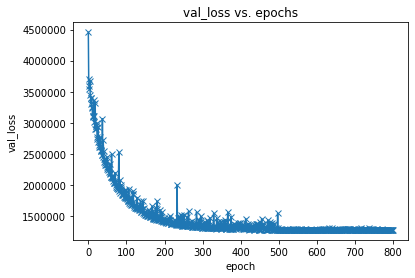

In [236]:
#losses = [r['val_loss'] for r in [result] + history]
losses = [r['val_loss'] for r in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.title('val_loss vs. epochs');

Ran the model for 800 epochs and the validation loss has been reduced to 1276336.0000. Now,let's test the model with validation data.

## Performance

Validation set R square : 91.9 %


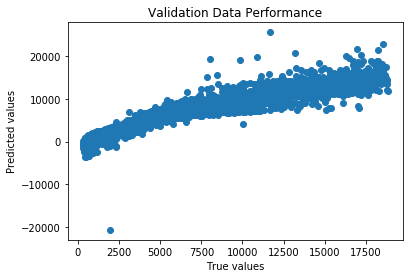

In [264]:
from sklearn.metrics import r2_score    


predictions_valid = [ model(xb).detach().squeeze(1).numpy() for xb,yb in val_loader]
y_pred_valid = [elem for pred in predictions for elem in pred]
y_true_valid = [(ytrue).item() for xb,yb in val_loader for ytrue in yb]

print(f'Validation set R square : {np.around((r2_score(y_true_valid,y_pred_valid)*100),2)} %')

plt.title("Validation Data Performance")
plt.scatter(y_true_valid,y_pred_valid)
# sns.lmplot(y_true_valid, y_pred_valid,ci=None)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()


## Step 7 : Test the model on validation data

In [237]:
def predict_single(x, model):
    xb = x.unsqueeze(0)
    return model(x).item()

`predict_single` function retruns the predicted diamond price value for a given input tensor

In [265]:
x, target = val_ds[10]
pred = predict_single(x, model)
print("Input: ", x)
print("Target: ", target.item())
print("Prediction:", pred)

Input:  tensor([ 0.5300, 67.0000,  5.2200,  5.1100,  3.2200,  1.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,
         0.0000])
Target:  1778.0
Prediction: 1688.904541015625


In [253]:
x, target = val_ds[0]
pred = predict_single(x, model)
print("Input: ", x)
print("Target: ", target.item())
print("Prediction:", pred)

Input:  tensor([ 1.0100, 54.0000,  6.3900,  6.3500,  4.0200,  0.0000,  0.0000,  0.0000,
         0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
         0.0000])
Target:  3818.0
Prediction: 3522.951904296875


The model performance can improve by introducing the hidden layers to the current model, and can further improve the optimkzer to [Adam optimizer.](https://arxiv.org/abs/1412.6980)

Well !! we have just completed our first machine learning alogirth using PyTorch. Thanks for Reading !! and try yourself with your own dataset.

Happy Learning ! Happy coding !

## References:

1. https://www.youtube.com/watch?v=4ZZrP68yXCI&feature=youtu.be
2. https://github.com/madewithml/basics/blob/master/notebooks/07_Linear_Regression/07_PT_Linear_Regression.ipynb
3. https://cs.brown.edu/courses/csci1951-a/assignments/stats_handout.html
4. https://jovian.ml/forum/c/pytorch-zero-to-gans/18
5. https://www.kaggle.com/shivam2503/diamonds

## Save and upload

In [266]:
torch.save(model.state_dict(), 'Diamond_prediction_linear.pth')

In [4]:
jovian.commit(project='Diamond_Prediction_linear', environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vineel369/diamond-prediction-linear" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ml/vineel369/diamond-prediction-linear


'https://jovian.ml/vineel369/diamond-prediction-linear'